## SEP 787 Machine Learning: Classification Models
## Prediction Sepsis from U.S. Hospital EHR Clinical Data
### Group 9

In [90]:
# import python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview

The original dataset is exceeds the GitHub file size limit of 100MB. Thus the code below first splits the csv file into two files.  
*  data_hospital1.csv contains the observations from Hospital 1. This will be the __training__ set
*  data_hospital2.csv contains the observations from Hospital 2. This will be the __testing__ set.

In [91]:
# import data and split into train set (Hospital 1) and test set (Hospital 2)

# df_combined = pd.read_csv(r"C:\Users\nancy\Documents\University\eHealth\SEP787_Classification\Project2\Dataset.csv")

# rows_to_drop = df_combined.loc[df_combined['Patient_ID'].apply(lambda x: len(str(x)) == 6)]
# df_train = df_combined.drop(rows_to_drop.index)
# df_train.to_csv('data_hospital1.csv', index=False)

# rows_to_drop = df_combined.loc[df_combined['Patient_ID'].apply(lambda x: len(str(x)) != 6)]
# df_test = df_combined.drop(rows_to_drop.index)
# df_test.to_csv('data_hospital2.csv', index=False)

In [92]:
# importing the test and training data
df_train = pd.read_csv(r"data_hospital1.csv")
df_test = pd.read_csv(r"data_hospital2.csv")

In [93]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,790215.0,25.332445,27.954160,0.00,9.00,20.00,33.00,335.00
Hour,790215.0,25.332445,27.954160,0.00,9.00,20.00,33.00,335.00
HR,729026.0,84.985264,16.940431,20.00,73.00,84.00,96.00,280.00
O2Sat,695136.0,97.265688,2.908794,20.00,96.00,98.00,99.50,100.00
Temp,266901.0,37.026737,0.780317,20.90,36.56,37.06,37.55,42.22
SBP,670014.0,120.962359,21.520567,22.00,105.00,118.50,134.00,281.00
MAP,709357.0,78.767345,15.044038,20.00,68.00,77.00,87.33,300.00
DBP,409918.0,59.985809,12.572771,20.00,51.00,58.50,67.00,298.00
Resp,712957.0,18.773460,5.395750,1.00,15.00,18.00,22.00,69.00
EtCO2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,761995.0,25.658981,29.813926,0.00,9.00,19.00,33.0000,335.00
Hour,761995.0,25.658981,29.813926,0.00,9.00,19.00,33.0000,335.00
HR,669785.0,84.141905,17.724160,20.00,71.50,83.00,95.0000,211.00
O2Sat,654338.0,97.117749,2.964618,20.00,96.00,98.00,99.5000,100.00
Temp,258325.0,36.926076,0.755826,30.00,36.50,36.90,37.4000,50.00
SBP,655931.0,126.598433,24.533018,20.00,109.00,124.00,142.0000,300.00
MAP,649583.0,86.367137,16.774449,30.00,74.50,84.00,96.0000,300.00
DBP,655738.0,66.234002,14.237016,20.00,56.00,65.00,74.0000,300.00
Resp,600918.0,18.670780,4.720294,1.00,16.00,18.00,21.0000,100.00
EtCO2,57636.0,32.957657,7.951662,10.00,28.00,33.00,38.0000,100.00


In [95]:
# identify total number of unique patients in the datasets
patients_train = len(df_train['Patient_ID'].unique())
patients_test = len(df_test['Patient_ID'].unique())

print(f"Hospital 1 Patients (Train Set): {patients_train}\nHospital 2 Patients (Test Set): {patients_test}")

Hospital 1 Patients (Train Set): 20336
Hospital 2 Patients (Test Set): 20000


In [96]:
# all unique patient IDs from training sets
df_train['Patient_ID'].unique()

array([17072, 16153,   465, ..., 15518, 11204, 16023])

In [97]:
# observations with Sepsis
train_sepsis = df_train.loc[df_train['SepsisLabel'] == 1] 
test_sepsis = df_test.loc[df_test['SepsisLabel'] == 1] 
train_sepsis

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
285,50,50,87.0,100.0,NaN,105.0,65.0,67.0,19.0,NaN,...,NaN,NaN,59.28,1,NaN,NaN,-0.02,53,1,11093
286,51,51,93.0,100.0,NaN,94.0,72.0,56.0,18.0,NaN,...,NaN,NaN,59.28,1,NaN,NaN,-0.02,54,1,11093
287,52,52,95.0,100.0,NaN,110.0,80.0,90.0,13.0,NaN,...,NaN,NaN,59.28,1,NaN,NaN,-0.02,55,1,11093
288,53,53,94.0,100.0,NaN,95.0,74.0,58.0,20.0,NaN,...,NaN,NaN,59.28,1,NaN,NaN,-0.02,56,1,11093
289,54,54,94.0,100.0,NaN,95.0,73.0,58.0,22.0,NaN,...,NaN,NaN,59.28,1,NaN,NaN,-0.02,57,1,11093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789262,6,6,111.0,100.0,36.39,120.0,91.0,77.0,15.0,NaN,...,395.0,NaN,36.66,0,1.0,0.0,-22.60,7,1,6257
789263,7,7,108.0,100.0,36.67,125.0,94.0,79.0,15.0,NaN,...,NaN,NaN,36.66,0,1.0,0.0,-22.60,8,1,6257
789264,8,8,100.0,99.0,36.67,131.0,98.0,82.0,15.0,NaN,...,349.0,242.0,36.66,0,1.0,0.0,-22.60,9,1,6257
789265,9,9,95.0,100.0,36.83,120.0,89.0,73.0,15.0,NaN,...,NaN,NaN,36.66,0,1.0,0.0,-22.60,10,1,6257


In [98]:
# number of patients with sepsis
train_sepsis_px = len(train_sepsis['Patient_ID'].unique())
test_sepsis_px = len(test_sepsis['Patient_ID'].unique())

# percentage of patients with sepsis
train_sepsis_pct = round(train_sepsis_px/patients_train * 100, 2)
test_sepsis_pct = round(test_sepsis_px/patients_test * 100, 2)

print(f"Train Set Patients with Sepsis: {train_sepsis_px} ({train_sepsis_pct} %) ")
print(f"Test Set Patients with Sepsis: {test_sepsis_px} ({test_sepsis_pct} %) ")

Train Set Patients with Sepsis: 1790 (8.8 %) 
Test Set Patients with Sepsis: 1142 (5.71 %) 


/var/folders/5k/6tzzfwr97mjfb2yrp51r1kn80000gn/T/ipykernel_6641/1399562720.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p1 = sns.countplot(data=df_train,x='SepsisLabel',ax=ax[0]).set(
/var/folders/5k/6tzzfwr97mjfb2yrp51r1kn80000gn/T/ipykernel_6641/1399562720.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p2 = sns.countplot(data=df_test,x='SepsisLabel',ax=ax[1]).set(


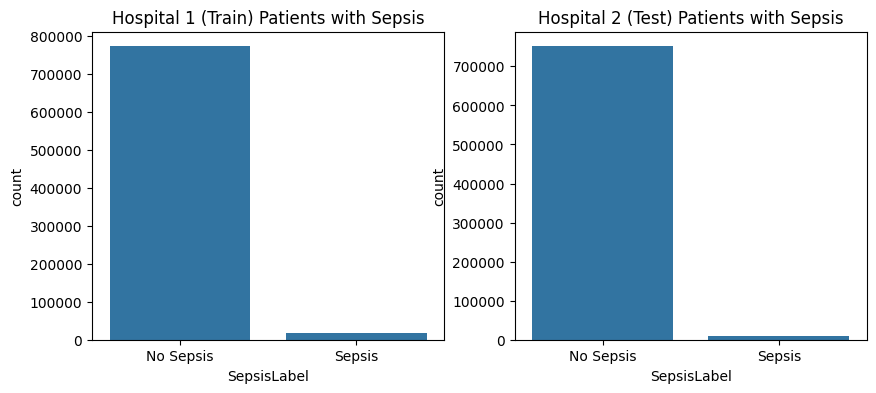

In [99]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
p1 = sns.countplot(data=df_train,x='SepsisLabel',ax=ax[0]).set(
    title='Hospital 1 (Train) Patients with Sepsis',
    xticklabels=(["No Sepsis", "Sepsis"])
)

p2 = sns.countplot(data=df_test,x='SepsisLabel',ax=ax[1]).set(
    title='Hospital 2 (Test) Patients with Sepsis',
    xticklabels=(["No Sepsis", "Sepsis"])
)

plt.show()

In [100]:
# overall view of a single patient 
df_train.loc[df_train['Patient_ID'] == 2] 

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
9717,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,75.91,0,0.0,1.0,-98.6,1,0,2
9718,1,1,61.0,99.0,36.44,124.0,65.0,43.0,17.5,NaN,...,NaN,NaN,75.91,0,0.0,1.0,-98.6,2,0,2
9719,2,2,64.0,98.0,NaN,125.0,64.0,41.0,27.0,NaN,...,NaN,NaN,75.91,0,0.0,1.0,-98.6,3,0,2
9720,3,3,56.0,100.0,NaN,123.0,65.0,41.0,9.0,NaN,...,NaN,NaN,75.91,0,0.0,1.0,-98.6,4,0,2
9721,4,4,66.0,99.0,NaN,120.0,67.0,43.0,23.0,NaN,...,NaN,NaN,75.91,0,0.0,1.0,-98.6,5,0,2
9722,5,5,94.0,100.0,36.22,194.0,116.0,66.0,14.0,NaN,...,NaN,NaN,75.91,0,0.0,1.0,-98.6,6,0,2
9723,6,6,58.0,99.0,NaN,133.0,68.0,43.0,13.0,NaN,...,NaN,NaN,75.91,0,0.0,1.0,-98.6,7,0,2
9724,7,7,57.0,100.0,NaN,118.0,62.0,37.0,18.0,NaN,...,NaN,NaN,75.91,0,0.0,1.0,-98.6,8,0,2
9725,8,8,62.0,100.0,NaN,126.0,66.0,37.0,12.0,NaN,...,NaN,NaN,75.91,0,0.0,1.0,-98.6,9,0,2
9726,9,9,58.0,95.0,36.11,143.0,77.0,47.0,11.0,NaN,...,NaN,158.0,75.91,0,0.0,1.0,-98.6,10,0,2


In [101]:
df_train.loc[df_train['Patient_ID'] == 11093]["WBC"] 

235     NaN
236    17.7
237    17.7
238     NaN
239     NaN
240     NaN
241     NaN
242     NaN
243     NaN
244     NaN
245     NaN
246     NaN
247     NaN
248     NaN
249     NaN
250     NaN
251     NaN
252     NaN
253     NaN
254    13.0
255    13.0
256     NaN
257     NaN
258     NaN
259     NaN
260     NaN
261     NaN
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
267     NaN
268     NaN
269     NaN
270     NaN
271     NaN
272     NaN
273     NaN
274     NaN
275     NaN
276     NaN
277     NaN
278     NaN
279     NaN
280     NaN
281     NaN
282     9.5
283     9.5
284     NaN
285     NaN
286     NaN
287     NaN
288     NaN
289     NaN
290     8.9
291     8.9
292     NaN
293     NaN
294     NaN
Name: WBC, dtype: float64

In [102]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790215 entries, 0 to 790214
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        790215 non-null  int64  
 1   Hour              790215 non-null  int64  
 2   HR                729026 non-null  float64
 3   O2Sat             695136 non-null  float64
 4   Temp              266901 non-null  float64
 5   SBP               670014 non-null  float64
 6   MAP               709357 non-null  float64
 7   DBP               409918 non-null  float64
 8   Resp              712957 non-null  float64
 9   EtCO2             0 non-null       float64
 10  BaseExcess        82381 non-null   float64
 11  HCO3              63617 non-null   float64
 12  FiO2              112155 non-null  float64
 13  pH                90615 non-null   float64
 14  PaCO2             69288 non-null   float64
 15  SaO2              39160 non-null   float64
 16  AST               11

### Convert Datatype of Categorical Variables

In [103]:
# convert Unit1 and Unit2 to int type since binary value expected
# # training set
# df_train['Unit1'] = df_train['Unit1'].astype('Int64')
# df_train['Unit2'] = df_train['Unit1'].astype('Int64')

# # testing set
# df_test['Unit1'] = df_test['Unit1'].astype('Int64')
# df_test['Unit2'] = df_test['Unit1'].astype('Int64')
 
# displaying the datatypes
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790215 entries, 0 to 790214
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        790215 non-null  int64  
 1   Hour              790215 non-null  int64  
 2   HR                729026 non-null  float64
 3   O2Sat             695136 non-null  float64
 4   Temp              266901 non-null  float64
 5   SBP               670014 non-null  float64
 6   MAP               709357 non-null  float64
 7   DBP               409918 non-null  float64
 8   Resp              712957 non-null  float64
 9   EtCO2             0 non-null       float64
 10  BaseExcess        82381 non-null   float64
 11  HCO3              63617 non-null   float64
 12  FiO2              112155 non-null  float64
 13  pH                90615 non-null   float64
 14  PaCO2             69288 non-null   float64
 15  SaO2              39160 non-null   float64
 16  AST               11

### Categorical Columns

In [104]:
# get other columns
columns_cat = ['Unit1', 'Unit2', 'Gender', 'SepsisLabel']

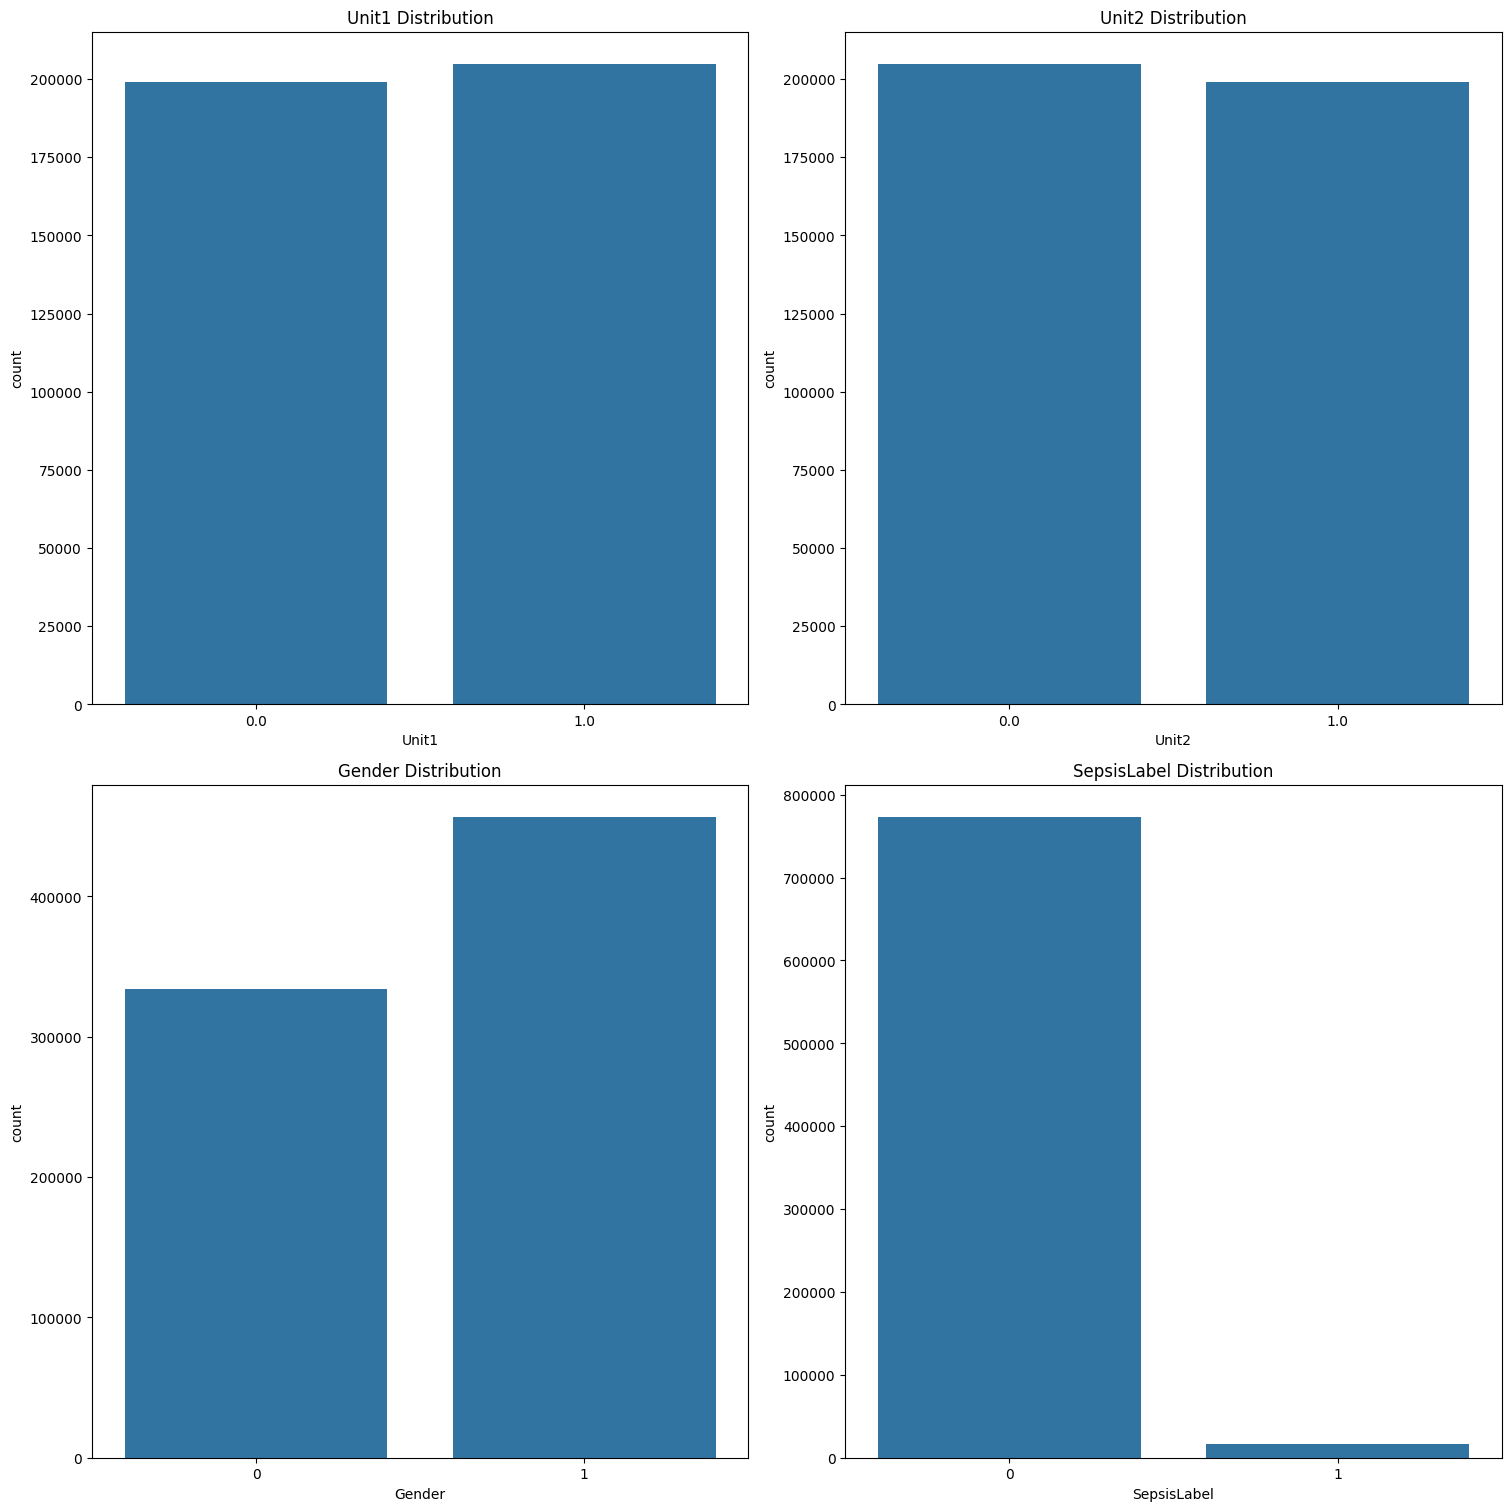

In [105]:
# Set the size of the plot 
plt.figure(figsize=(15, 15), layout="constrained")

# Loop through each column and create a distribution plot
for i, column in enumerate(columns_cat, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df_train, x=column)
    plt.title(f'{column} Distribution')

plt.show()

<Axes: >

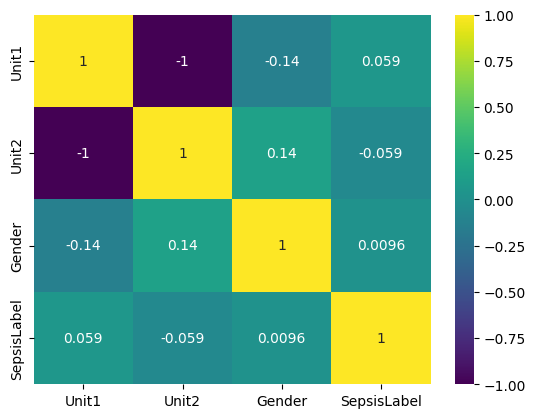

In [106]:
# get correlations
sns.heatmap(df_train[columns_cat].corr(numeric_only=True),cmap='viridis', vmin=-1, vmax=1, annot=True)

Unit1 and Unit2 appear to provide redundant information. Thus, moving forward, Unit2 will be dropped. It will be assumed for Unit1 that:  
*  Unit1 = 0, ICU unit is SICU
*  Unit1 = 1, ICU unit is MICU
*  Unit1 = NaN, ICU unit is unknown

In [107]:
# drop unnecessary and redundant columns
col_drop = ["Unnamed: 0", 
            "Hour",
            "Unit2"]
df_train = df_train.drop(columns=col_drop)

### Numerical Columns

In [108]:
# get numerical columns
# columns_num = df_train.select_dtypes(include=['float64']).columns
columns_num = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'HospAdmTime']

columns_num

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'EtCO2',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Chloride',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'Hct',
 'Hgb',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'Age',
 'HospAdmTime']

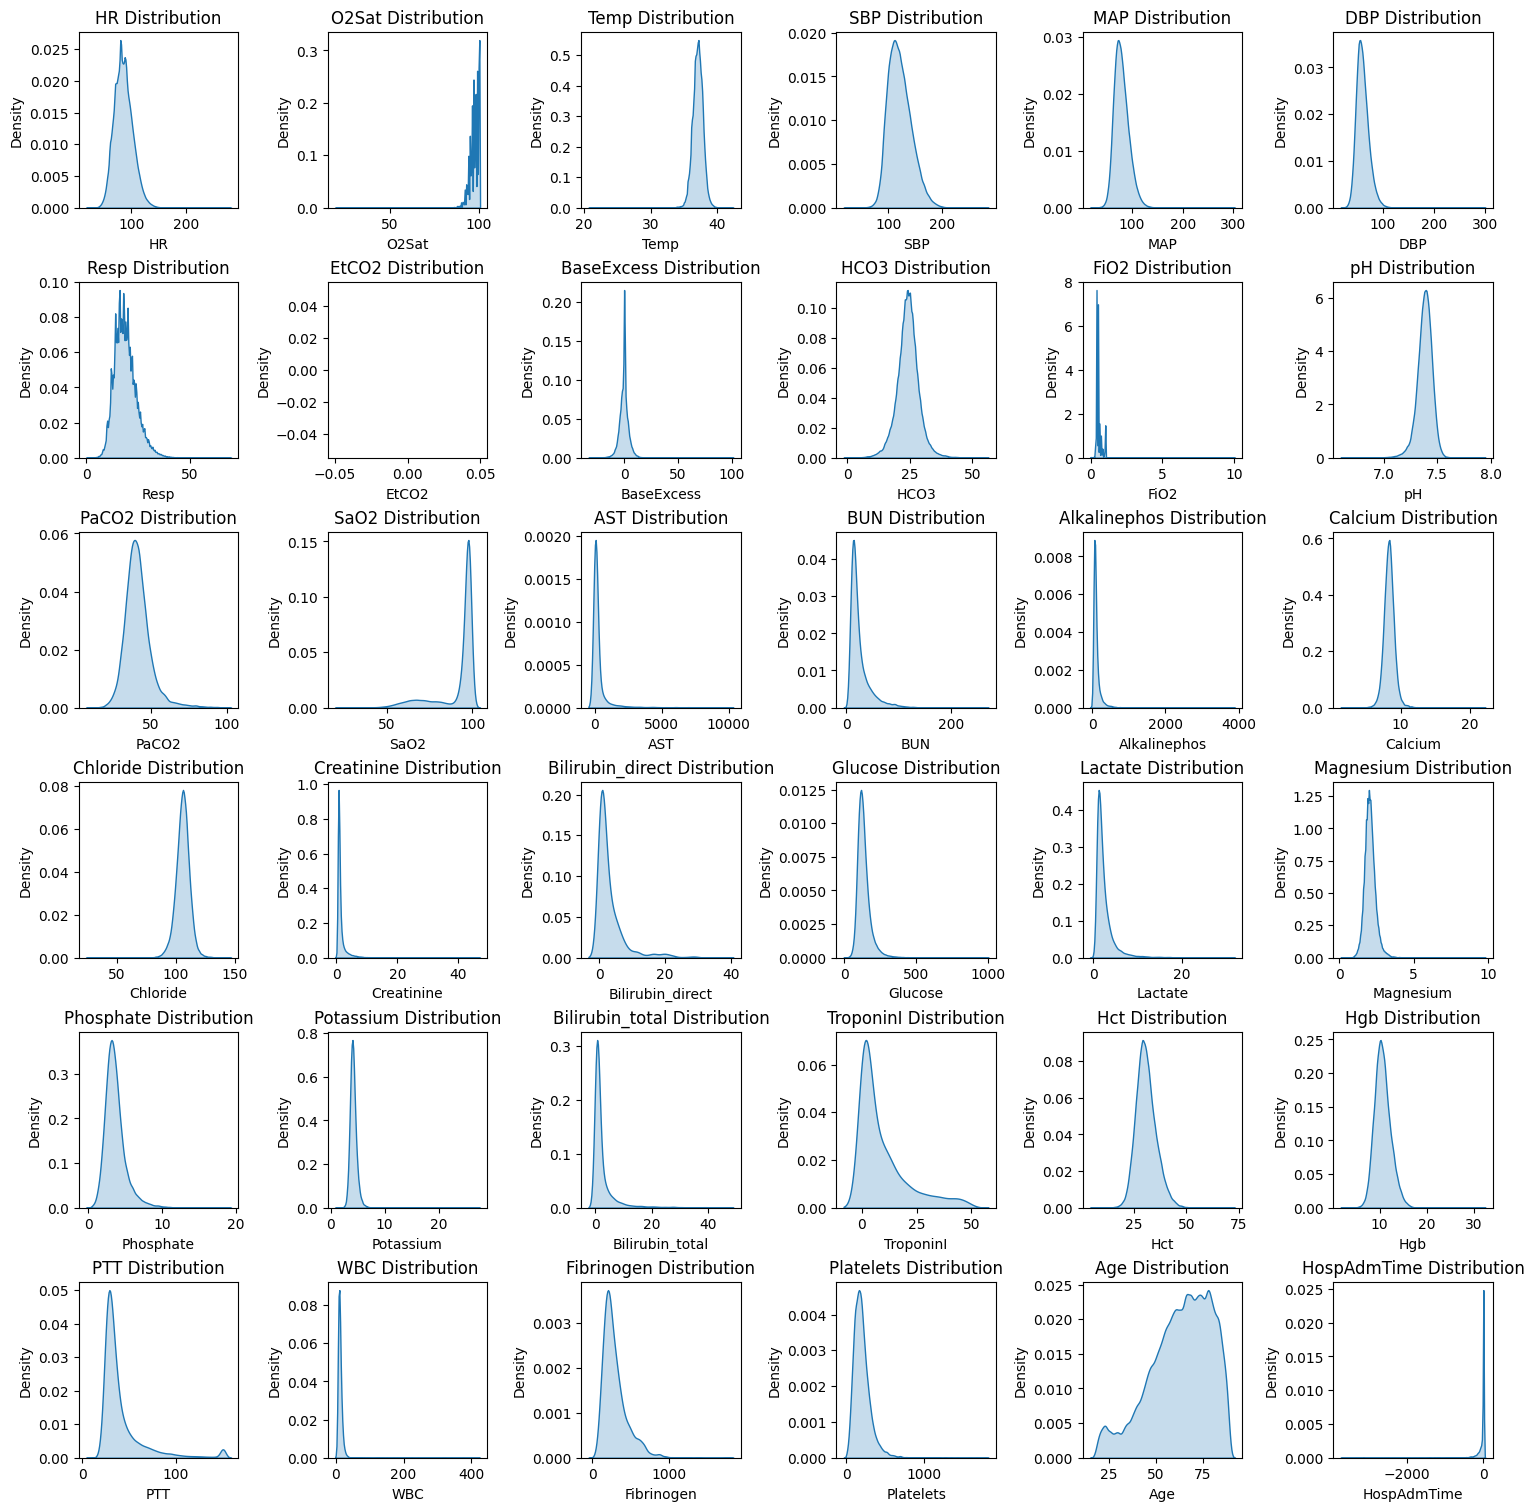

In [109]:
# Set the size of the plot 
plt.figure(figsize=(15, 15), layout="constrained")

# Loop through each column and create a distribution plot
for i, column in enumerate(columns_num, 1):
    plt.subplot(6, 6, i)
    sns.kdeplot(df_train[column], label=column, fill=True, warn_singular=False)
    plt.title(f'{column} Distribution')

plt.show()

## Missing Values

In [110]:
# identify total missing values
df_train.isnull().sum()

HR                   61189
O2Sat                95079
Temp                523314
SBP                 120201
MAP                  80858
DBP                 380297
Resp                 77258
EtCO2               790215
BaseExcess          707834
HCO3                726598
FiO2                678060
pH                  699600
PaCO2               720927
SaO2                751055
AST                 778395
BUN                 725739
Alkalinephos        778683
Calcium             750897
Chloride            724438
Creatinine          737728
Bilirubin_direct    789033
Glucose             693559
Lactate             763072
Magnesium           728734
Phosphate           750319
Potassium           704379
Bilirubin_total     780522
TroponinI           789250
Hct                 697157
Hgb                 720394
PTT                 751909
WBC                 730867
Fibrinogen          784185
Platelets           738716
Age                      0
Gender                   0
Unit1               386165
H

In [111]:
# Define a function named 'percent_missing' that takes a DataFrame 'df' as its input.
def percent_missing(df):
    
    # Calculate the percentage of missing values for each column in the DataFrame.
    percent_nan = (df.isnull().sum() / len(df)) * 100
    
    # Filter out columns with no missing values (percentage = 0) and sort the remaining columns by their missing percentage.
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    # Return the sorted Series containing the percentage of missing values for each column.
    return percent_nan

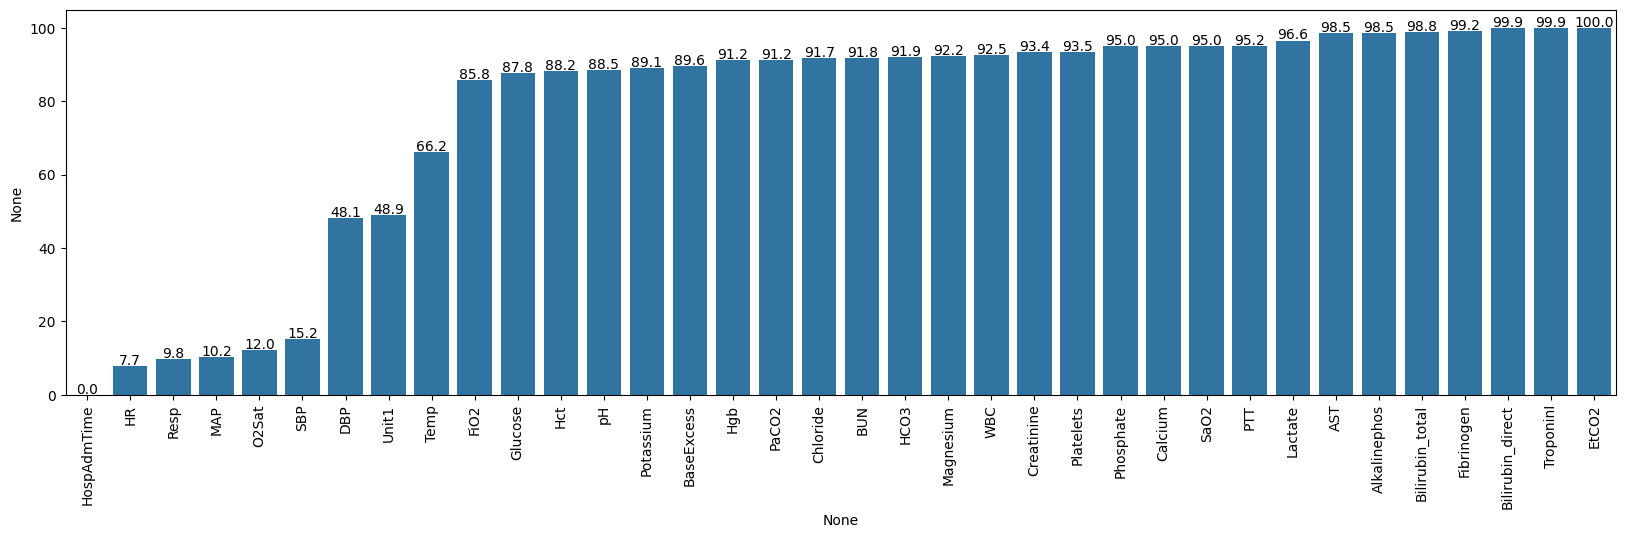

In [112]:
percent_nan = percent_missing(df_train)

# set figure size
plt.figure(figsize=(20,5))

# create barplot of columns with missing values
p_na = sns.barplot(x=percent_nan.index, y=percent_nan)

# Add values above bars
for i, v in enumerate(percent_nan):
   p_na.text(i, v + 0.4, str(round(v,1)), ha='center')
plt.xticks(rotation=90);
plt.show()


As can be seen in the bar plot above, the majority of columns contains missing values. EtCO2 appears to have 100% missing values.

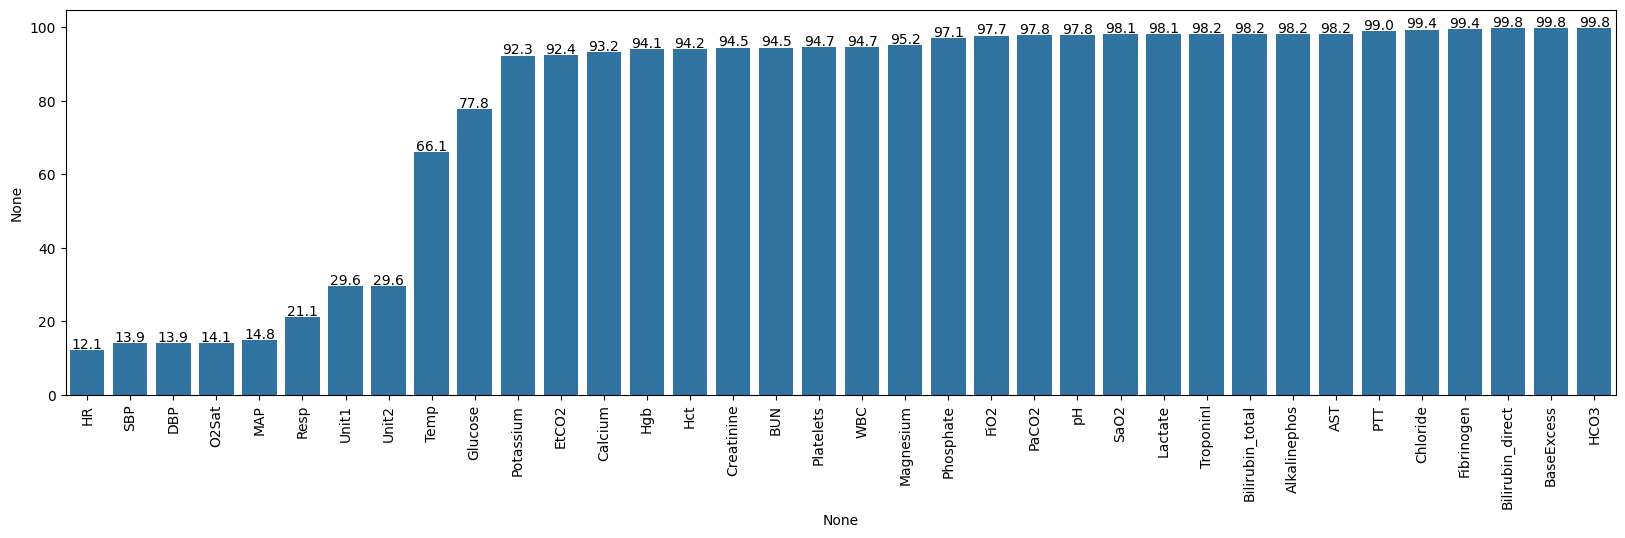

In [113]:
percent_nan_test = percent_missing(df_test)

# set figure size
plt.figure(figsize=(20,5))

# create barplot of columns with missing values
p_na = sns.barplot(x=percent_nan_test.index, y=percent_nan_test)

# Add values above bars
for i, v in enumerate(percent_nan_test):
   p_na.text(i, v + 0.4, str(round(v,1)), ha='center')
plt.xticks(rotation=90);
plt.show()

In [114]:
# confirm EtCO2 column is empty
df_train['EtCO2'].unique()

array([nan])

In [115]:
# define columns for missing values analysis
col_na = ['HospAdmTime', 'HR', 'Resp', 'MAP', 'O2Sat', 'SBP', 'DBP', 'Unit1', 'Temp', 'FiO2', 'Glucose', 'Hct', 'pH', 'Potassium', 'BaseExcess', 
          'Hgb','PaCO2', 'Chloride', 'BUN', 'HCO3', 'Magnesium', 'WBC', 'Creatinine','Platelets', 
          'Phosphate', 'Calcium', 'SaO2', 'PTT', 'Lactate', 
          'AST', 'Alkalinephos', 'Bilirubin_total', 'Fibrinogen', 'Bilirubin_direct', 'TroponinI']

ValueError: num must be an integer with 1 <= num <= 28, not 29

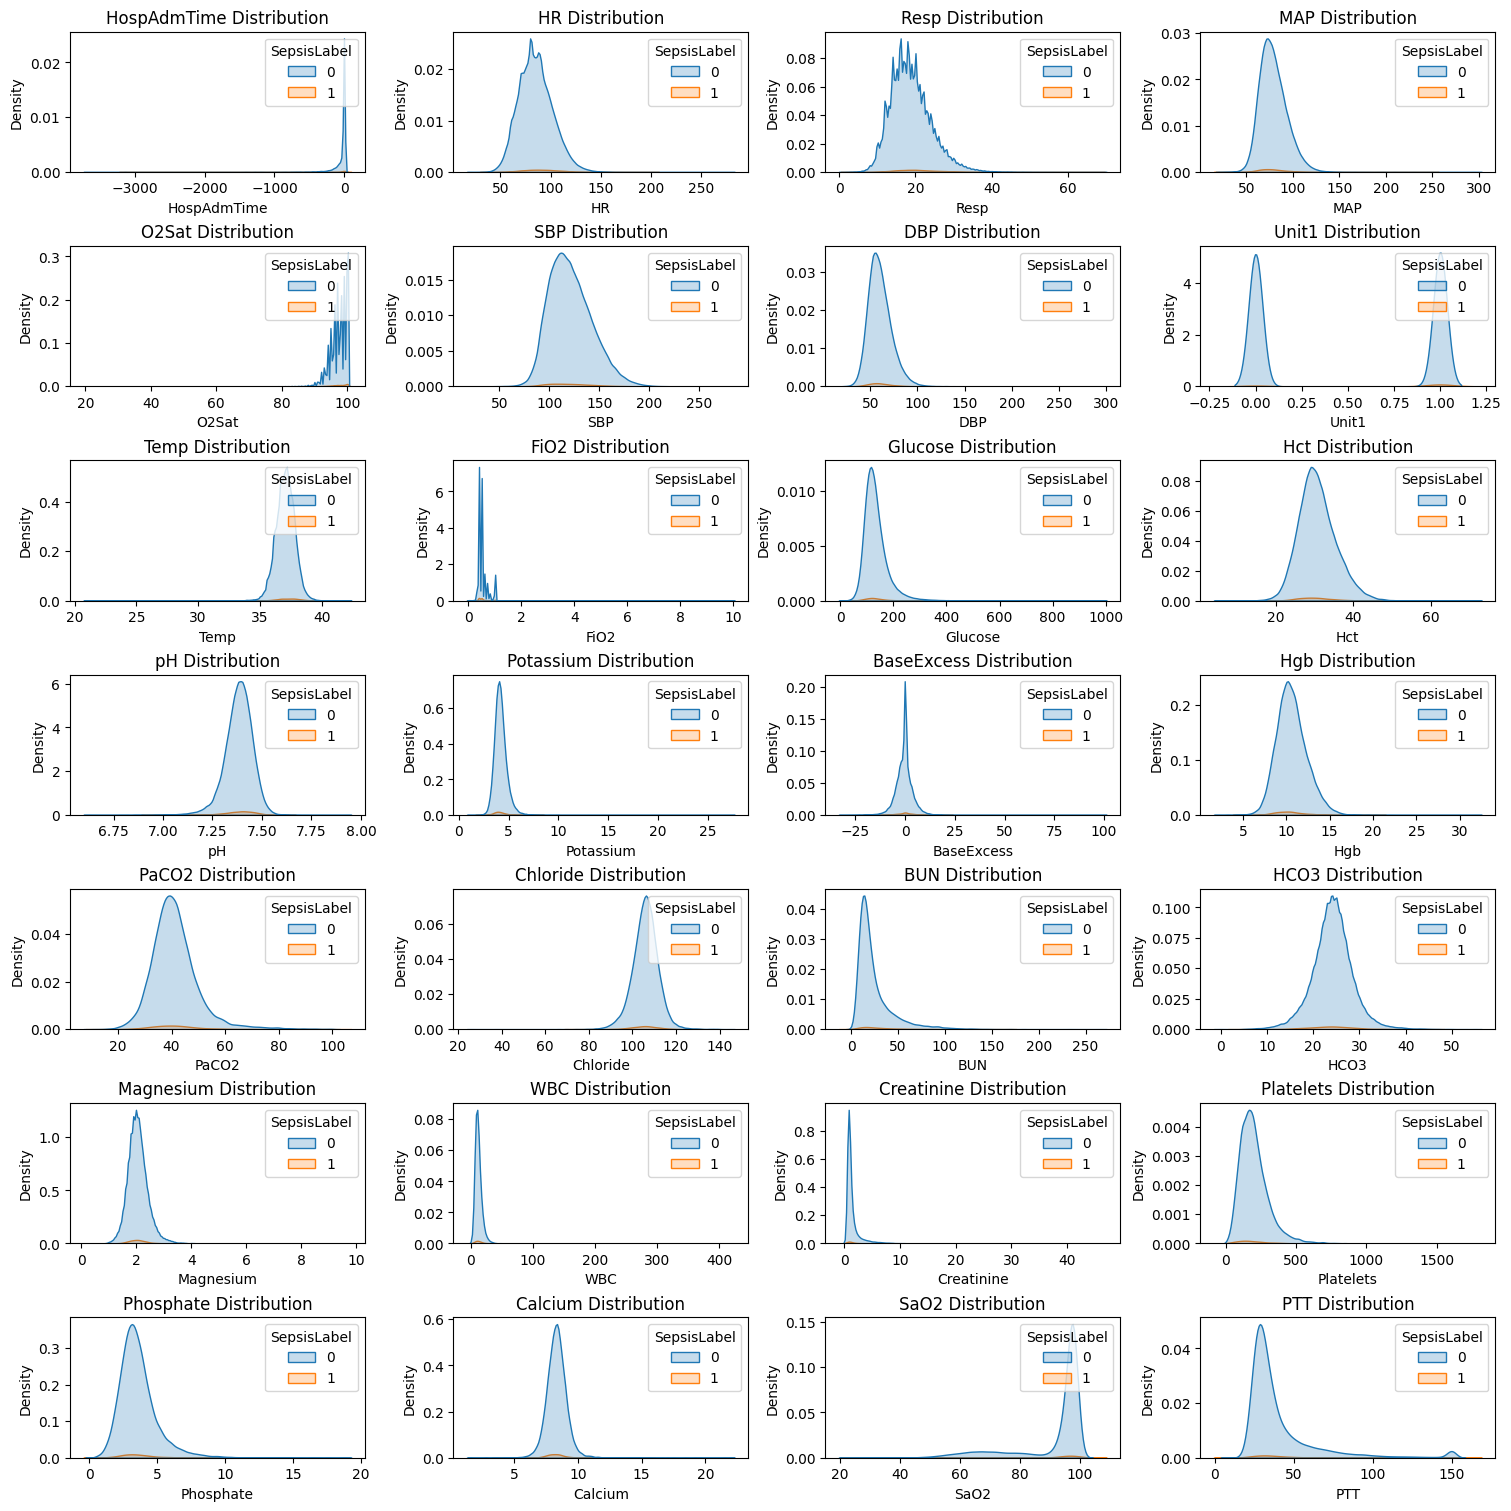

In [116]:
# Set the size of the plot 
plt.figure(figsize=(15, 15), layout="constrained")

# Loop through each column and create a distribution plot
for i, column in enumerate(col_na, 1):
    plt.subplot(7, 4, i)
    sns.kdeplot(data=df_train, hue="SepsisLabel", x=column, fill=True, warn_singular=False)
    plt.title(f'{column} Distribution')

plt.show()

<Axes: >

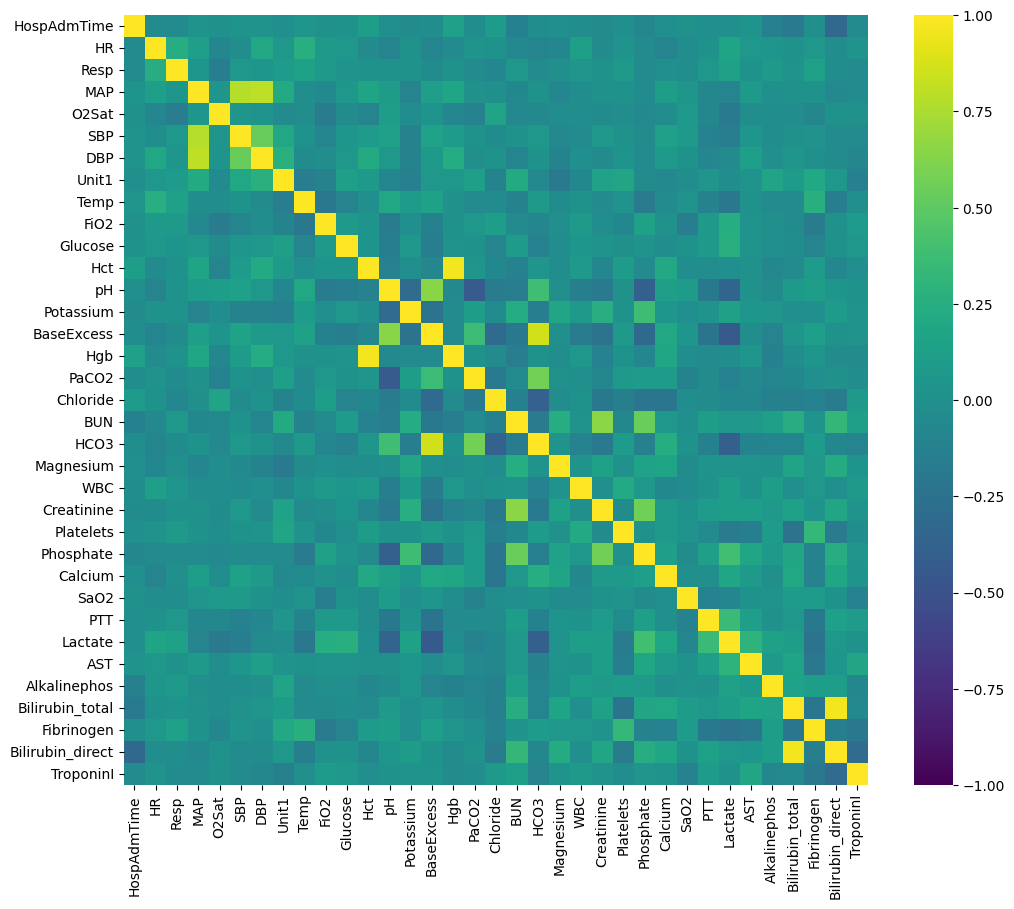

In [118]:
# get correlations
plt.figure(figsize=(12,10))
sns.heatmap(df_train[col_na].corr(numeric_only=True),cmap='viridis', vmin=-1, vmax=1, annot=False)

In [119]:
# closer look at highly correlate values
corr_bp = ['MAP', 'SBP', 'DBP']
corr_O2 = ['O2Sat','SaO2','FiO2','Hct', 'Hgb']
corr_acidosis = ['pH', 'BaseExcess', 'HCO3', 'PaCO2', 'Lactate']
corr_kidney = ['Potassium', 'Chloride', 'BUN', 'Magnesium', 'Creatinine','Phosphate']

<Axes: >

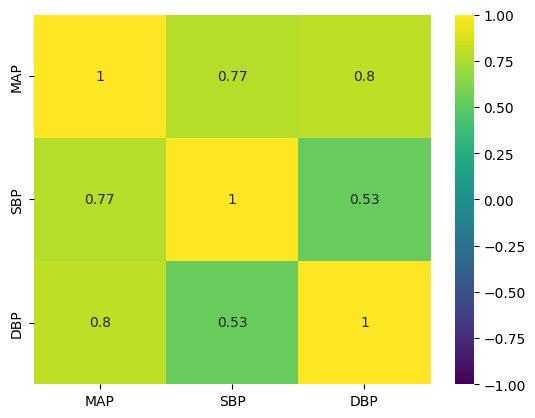

In [120]:
# Blood Pressure
sns.heatmap(df_train[corr_bp].corr(numeric_only=True),cmap='viridis', vmin=-1, vmax=1, annot=True)

In [121]:
# Red Blood Cells and Oxygenations
sns.heatmap(df_train[corr_bc].corr(numeric_only=True),cmap='viridis', vmin=-1, vmax=1, annot=True)

NameError: name 'corr_bc' is not defined

<Axes: >

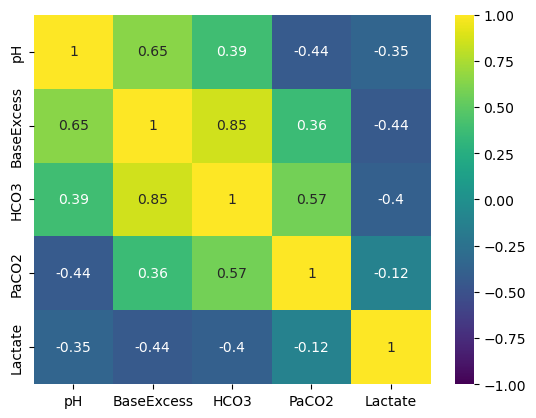

In [ ]:
# Acidosis
sns.heatmap(df_train[corr_acidosis].corr(numeric_only=True),cmap='viridis', vmin=-1, vmax=1, annot=True)

<Axes: >

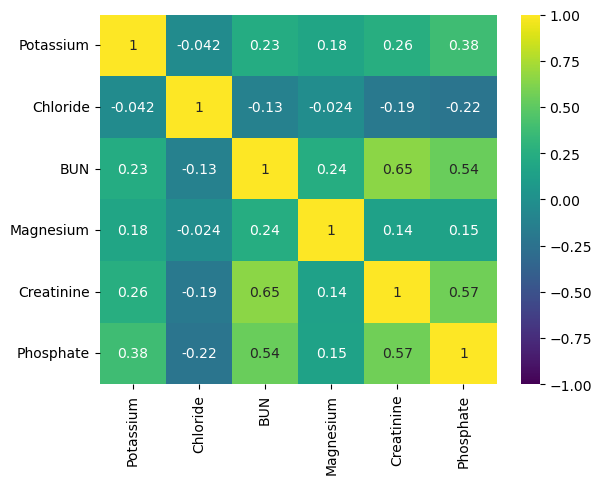

In [ ]:
# Kidney Funciton
sns.heatmap(df_train[corr_kidney].corr(numeric_only=True),cmap='viridis', vmin=-1, vmax=1, annot=True)

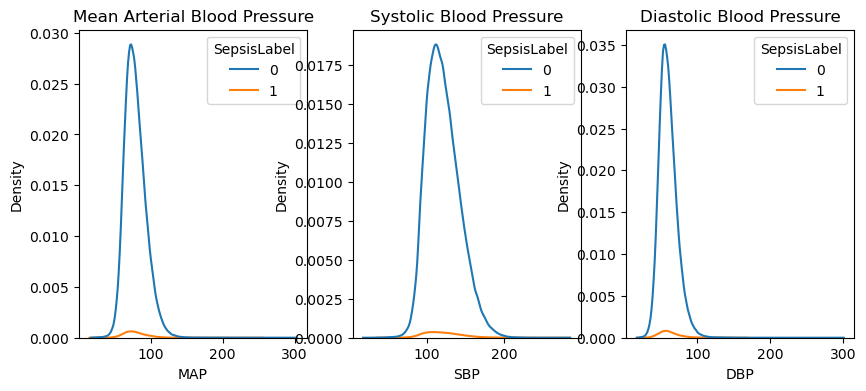

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(10,4))
p_MAP = sns.kdeplot(data=df_train,hue='SepsisLabel',x="MAP", ax=ax[0]).set(title='Mean Arterial Blood Pressure')

p_SBP = sns.kdeplot(data=df_train,hue='SepsisLabel',x="SBP", ax=ax[1]).set(title='Systolic Blood Pressure')
p_DBP = sns.kdeplot(data=df_train,hue='SepsisLabel',x="DBP", ax=ax[2]).set(title='Diastolic Blood Pressure')

plt.show()

The distributions of observations between Sepsis and non-Sepsis patients appears similar across all three features.

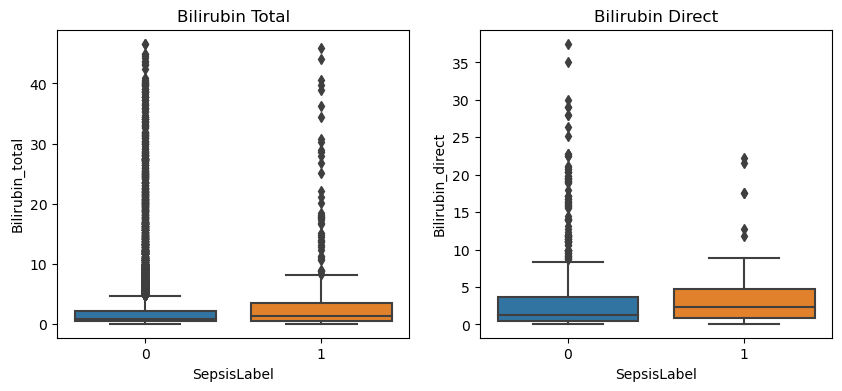

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
# Bilirubin Total
p1 = sns.boxplot(data=df_train,x='SepsisLabel',y="Bilirubin_total", ax=ax[0]).set(title='Bilirubin Total')

# Bilirubin Direct
p2 = sns.boxplot(data=df_train,x='SepsisLabel',y="Bilirubin_direct", ax=ax[1]).set(title='Bilirubin Direct')

plt.show()

In [ ]:
bt_medians = df_train.groupby("SepsisLabel")["Bilirubin_total"].median()
bt_medians

SepsisLabel
0    0.9
1    1.3
Name: Bilirubin_total, dtype: float64

In [ ]:
bd_medians = df_train.groupby("SepsisLabel")["Bilirubin_direct"].median()
bd_medians

SepsisLabel
0    1.3
1    2.4
Name: Bilirubin_direct, dtype: float64

In [ ]:
bt = df_train.isnull().sum()["Bilirubin_total"]
bd = df_train.isnull().sum()["Bilirubin_direct"]
print(f"Bilirubin Total NaN: {bt}")
print(f"Bilirubin Direct NaN: {bd}")

Bilirubin Total NaN: 780522
Bilirubin Direct NaN: 789033


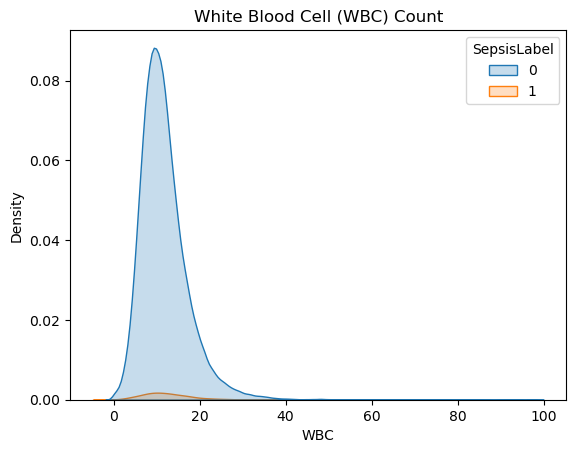

In [ ]:
# WBC 
p_WBC = sns.kdeplot(data=df_train[df_train['WBC']<100],hue='SepsisLabel',x="WBC", fill=True).set(title='White Blood Cell (WBC) Count')

### Grouping By Patient for Imputation

In [122]:
df_train_impute = df_train.copy()
df_train_impute

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,NaN,-0.02,1,0,17072
1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,NaN,-0.02,2,0,17072
2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,NaN,-0.02,3,0,17072
3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,NaN,-0.02,4,0,17072
4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,NaN,26.0,...,11.3,NaN,330.0,68.54,0,NaN,-0.02,5,0,17072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790210,93.5,99.0,36.11,80.0,63.0,50.5,9.5,NaN,NaN,NaN,...,NaN,NaN,NaN,45.96,1,NaN,-6.15,44,0,16023
790211,85.0,100.0,NaN,84.0,64.0,49.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.96,1,NaN,-6.15,45,0,16023
790212,86.0,99.5,NaN,84.0,64.0,50.0,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,45.96,1,NaN,-6.15,46,0,16023
790213,87.0,100.0,36.11,88.0,67.0,52.0,10.5,NaN,NaN,NaN,...,NaN,NaN,NaN,45.96,1,NaN,-6.15,47,0,16023


In [123]:
df_train_impute.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'HospAdmTime',
       'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [125]:
# drop columns with large proportion of missing values
col_dropna = ['SBP', 
              'DBP', 
              'EtCO2',
              'BaseExcess', 
              'HCO3', 
              'PaCO2', 
              'SaO2', 
              'AST', 
              'BUN',
              'Alkalinephos', 
              'Calcium', 
              'Chloride', 
              'Creatinine', 
              'Bilirubin_direct',
              'Lactate', 
              'Magnesium', 
              'Phosphate',
              'Bilirubin_total', 
              'TroponinI', 
              'Hgb', 
              'PTT',
              'Fibrinogen', 
              'Platelets', 
              'Unit1']

In [126]:
df_train_impute = df_train_impute.drop(columns=col_dropna)

In [127]:
group_patient = df_train_impute.groupby('Patient_ID')

# number of missing values per column by patient
group_patient.count().rsub(group_patient.size(), axis=0)

,HR,O2Sat,Temp,MAP,Resp,FiO2,pH,Glucose,Potassium,Hct,WBC,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
Patient_ID,,,,,,,,,,,,,,,,
1,5,10,44,12,4,50,47,52,52,52,52,0,0,0,0,0
2,1,1,17,1,4,23,23,22,22,22,22,0,0,0,0,0
3,3,4,32,3,3,41,45,45,44,44,45,0,0,0,0,0
4,2,2,23,3,3,29,26,26,26,27,28,0,0,0,0,0
5,24,27,39,31,27,48,48,45,45,45,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20639,1,1,16,2,1,26,26,25,24,14,24,0,0,0,0,0
20640,0,0,1,0,1,12,19,20,23,20,24,0,0,0,0,0
20641,1,0,15,2,0,21,21,17,19,19,19,0,0,0,0,0


In [128]:
# identify patient with missing Hospital Admission Time
df_train_impute = df_train_impute.dropna(subset=['HospAdmTime'])

In [129]:
df_train_impute.columns

Index(['HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'pH', 'Glucose',
       'Potassium', 'Hct', 'WBC', 'Age', 'Gender', 'HospAdmTime', 'ICULOS',
       'SepsisLabel', 'Patient_ID'],
      dtype='object')

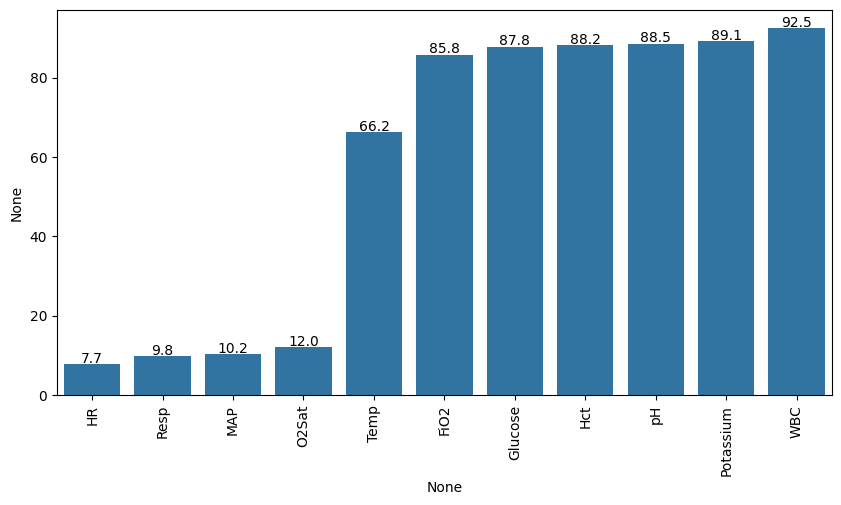

In [130]:
percent_nan_impute = percent_missing(df_train_impute)

# set figure size
plt.figure(figsize=(10,5))

# create barplot of columns with missing values
p_na_impute = sns.barplot(x=percent_nan_impute.index, y=percent_nan_impute)

# Add values above bars
for i, v in enumerate(percent_nan_impute):
   p_na_impute.text(i, v + 0.4, str(round(v,1)), ha='center')
plt.xticks(rotation=90);
plt.show()

In [131]:
percent_nan_impute.index

Index(['HR', 'Resp', 'MAP', 'O2Sat', 'Temp', 'FiO2', 'Glucose', 'Hct', 'pH',
       'Potassium', 'WBC'],
      dtype='object')

In [132]:
df_train_impute

,HR,O2Sat,Temp,MAP,Resp,FiO2,pH,Glucose,Potassium,Hct,WBC,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,-0.02,1,0,17072
1,65.0,100.0,NaN,72.0,16.5,0.4,NaN,NaN,NaN,NaN,NaN,68.54,0,-0.02,2,0,17072
2,78.0,100.0,NaN,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,-0.02,3,0,17072
3,73.0,100.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,-0.02,4,0,17072
4,70.0,100.0,NaN,74.0,14.0,0.4,NaN,161.0,3.2,29.7,11.3,68.54,0,-0.02,5,0,17072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790210,93.5,99.0,36.11,63.0,9.5,NaN,NaN,NaN,NaN,NaN,NaN,45.96,1,-6.15,44,0,16023
790211,85.0,100.0,NaN,64.0,10.0,0.4,NaN,NaN,NaN,NaN,NaN,45.96,1,-6.15,45,0,16023
790212,86.0,99.5,NaN,64.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,45.96,1,-6.15,46,0,16023
790213,87.0,100.0,36.11,67.0,10.5,0.4,NaN,NaN,NaN,NaN,NaN,45.96,1,-6.15,47,0,16023


In [133]:
df_train_impute.groupby('Patient_ID')["HR"]

In [134]:
# impute remaining missing values
columns_impute = list(percent_nan_impute.index)

for column in columns_impute:
    df_train_impute[column] = df_train_impute.groupby('Patient_ID')[column].transform(lambda val: val.fillna(val.mean()))
    
df_train_impute

/var/folders/5k/6tzzfwr97mjfb2yrp51r1kn80000gn/T/ipykernel_6641/1700417470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_impute[column] = df_train_impute.groupby('Patient_ID')[column].transform(lambda val: val.fillna(val.mean()))


,HR,O2Sat,Temp,MAP,Resp,FiO2,pH,Glucose,Potassium,Hct,WBC,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,77.857143,99.878049,36.925556,81.280488,14.175,0.476923,7.516667,143.000,3.666667,31.066667,12.900000,68.54,0,-0.02,1,0,17072
1,65.000000,100.000000,36.925556,72.000000,16.500,0.400000,7.516667,143.000,3.666667,31.066667,12.900000,68.54,0,-0.02,2,0,17072
2,78.000000,100.000000,36.925556,42.500000,14.175,0.476923,7.516667,143.000,3.666667,31.066667,12.900000,68.54,0,-0.02,3,0,17072
3,73.000000,100.000000,36.925556,81.280488,17.000,0.476923,7.516667,143.000,3.666667,31.066667,12.900000,68.54,0,-0.02,4,0,17072
4,70.000000,100.000000,36.925556,74.000000,14.000,0.400000,7.516667,161.000,3.200000,29.700000,11.300000,68.54,0,-0.02,5,0,17072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790210,93.500000,99.000000,36.110000,63.000000,9.500,0.419444,7.345000,98.625,4.100000,39.975000,11.866667,45.96,1,-6.15,44,0,16023
790211,85.000000,100.000000,36.388462,64.000000,10.000,0.400000,7.345000,98.625,4.100000,39.975000,11.866667,45.96,1,-6.15,45,0,16023
790212,86.000000,99.500000,36.388462,64.000000,11.000,0.419444,7.345000,98.625,4.100000,39.975000,11.866667,45.96,1,-6.15,46,0,16023
790213,87.000000,100.000000,36.110000,67.000000,10.500,0.400000,7.345000,98.625,4.100000,39.975000,11.866667,45.96,1,-6.15,47,0,16023


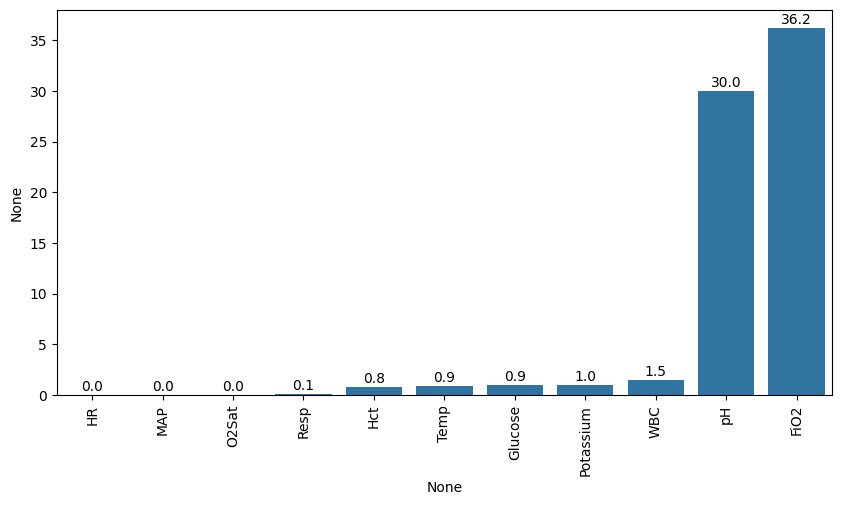

In [135]:
percent_nan_impute = percent_missing(df_train_impute)

# set figure size
plt.figure(figsize=(10,5))

# create barplot of columns with missing values
p_na_impute = sns.barplot(x=percent_nan_impute.index, y=percent_nan_impute)

# Add values above bars
for i, v in enumerate(percent_nan_impute):
   p_na_impute.text(i, v + 0.4, str(round(v,1)), ha='center')
plt.xticks(rotation=90);
plt.show()

After imputing the remaining features using the mean value per patient, the majority of the missing values have been addressed. Notably, pH and FiO2 still have greater than 30% missing values, indicating that over 30% of the patients in the dataset had no pH or FiO2 values recorded. Thus pH and FiO2 will also be dropped.

Since the remaining number of missing values is less than 5% for all other features, any remaining observations with missing values will be dropped.

In [136]:
# drop remaining missing values
df_train_impute = df_train_impute.drop(["pH","FiO2","Patient_ID"], axis=1)

In [137]:
df_train_impute = df_train_impute.dropna()
df_train_impute

,HR,O2Sat,Temp,MAP,Resp,Glucose,Potassium,Hct,WBC,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,77.857143,99.878049,36.925556,81.280488,14.175,143.000,3.666667,31.066667,12.900000,68.54,0,-0.02,1,0
1,65.000000,100.000000,36.925556,72.000000,16.500,143.000,3.666667,31.066667,12.900000,68.54,0,-0.02,2,0
2,78.000000,100.000000,36.925556,42.500000,14.175,143.000,3.666667,31.066667,12.900000,68.54,0,-0.02,3,0
3,73.000000,100.000000,36.925556,81.280488,17.000,143.000,3.666667,31.066667,12.900000,68.54,0,-0.02,4,0
4,70.000000,100.000000,36.925556,74.000000,14.000,161.000,3.200000,29.700000,11.300000,68.54,0,-0.02,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790210,93.500000,99.000000,36.110000,63.000000,9.500,98.625,4.100000,39.975000,11.866667,45.96,1,-6.15,44,0
790211,85.000000,100.000000,36.388462,64.000000,10.000,98.625,4.100000,39.975000,11.866667,45.96,1,-6.15,45,0
790212,86.000000,99.500000,36.388462,64.000000,11.000,98.625,4.100000,39.975000,11.866667,45.96,1,-6.15,46,0
790213,87.000000,100.000000,36.110000,67.000000,10.500,98.625,4.100000,39.975000,11.866667,45.96,1,-6.15,47,0


<Axes: >

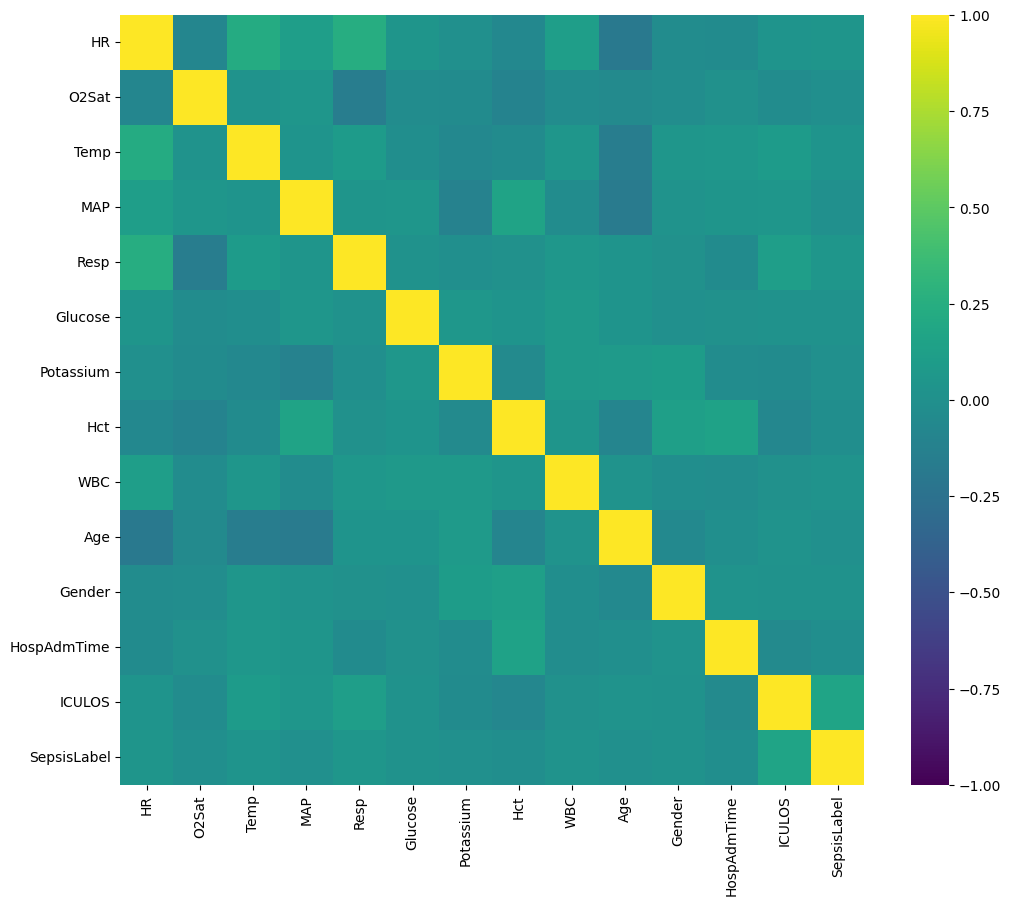

In [138]:
# get correlations
plt.figure(figsize=(12,10))
sns.heatmap(df_train_impute.corr(numeric_only=True),cmap='viridis', vmin=-1, vmax=1, annot=False)

Taking a look at the final model features, no significant correlations are identified.

In [139]:
df_train_impute.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HR,768163.0,84.983455,16.817393,20.00,73.000000,84.000000,96.000000,280.00
O2Sat,768163.0,97.246777,2.865875,20.00,96.000000,98.000000,99.000000,100.00
Temp,768163.0,36.943798,0.630418,20.90,36.555556,36.921333,37.330000,42.22
MAP,768163.0,78.933847,14.689339,20.00,69.000000,77.000000,87.330000,300.00
Resp,768163.0,18.786301,5.265254,1.00,15.000000,18.000000,22.000000,69.00
Glucose,768163.0,132.917579,39.449421,10.00,109.500000,125.722222,147.000000,988.00
Potassium,768163.0,4.118539,0.483927,1.00,3.800000,4.066667,4.366667,27.50
Hct,768163.0,31.440367,4.571416,5.50,28.220000,30.800000,34.200000,71.70
WBC,768163.0,11.780580,6.428582,0.10,8.325000,10.914286,14.050000,422.90
Age,768163.0,63.018647,16.125097,18.11,52.720000,65.270000,75.890000,89.00


## Outliers

[Text(0.5, 1.0, 'Hospital Admission Time')]

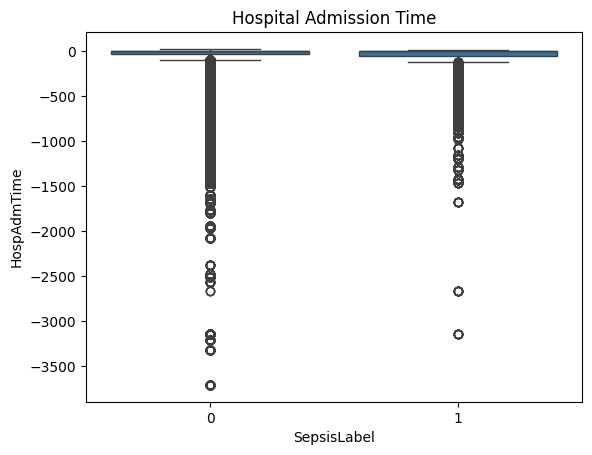

In [140]:
# Hospital Admission Time
sns.boxplot(data=df_train_impute, x='SepsisLabel', y="HospAdmTime").set(title='Hospital Admission Time')

[Text(0.5, 1.0, 'White Blood Cell Count')]

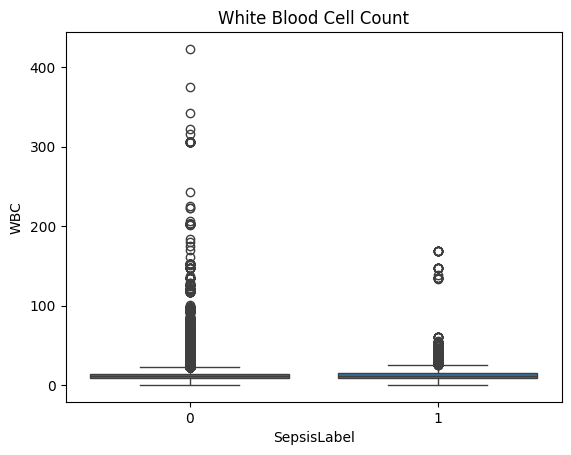

In [141]:
# WBC
sns.boxplot(data=df_train_impute, x='SepsisLabel', y="WBC").set(title='White Blood Cell Count')

[Text(0.5, 1.0, 'Mean Arterial Blood Pressure')]

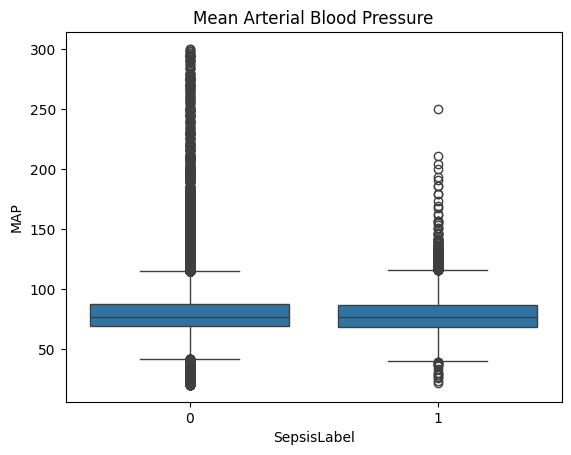

In [142]:
# MAP
sns.boxplot(data=df_train_impute, x='SepsisLabel', y="MAP").set(title='Mean Arterial Blood Pressure')

[Text(0.5, 1.0, 'Serum Glucose')]

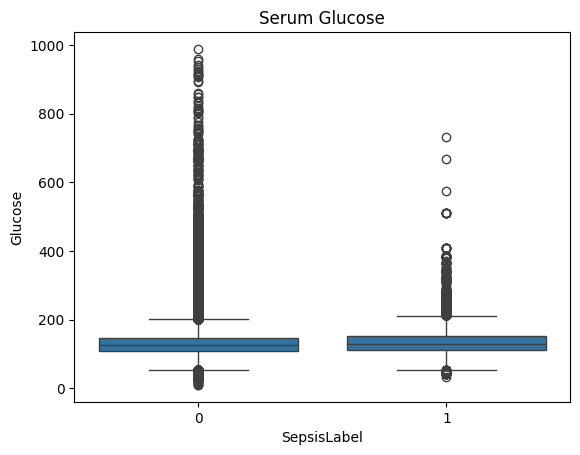

In [143]:
# glucose
sns.boxplot(data=df_train_impute, x='SepsisLabel', y="Glucose").set(title='Serum Glucose')

All though several features contains values far outside the typical adult vital signs and lab value ranges, all values are included. Critically patients may exihibit higher rates of abnormal vital sign values and these will be important in predicting Sepsis onset. 

# Splitting, Scaling, and Sampling

## Undersampling

Undersampling is chosen as the technique to address the unbalanced dataset, as this technique has a lower risk of overfitting.

<Axes: xlabel='SepsisLabel', ylabel='count'>

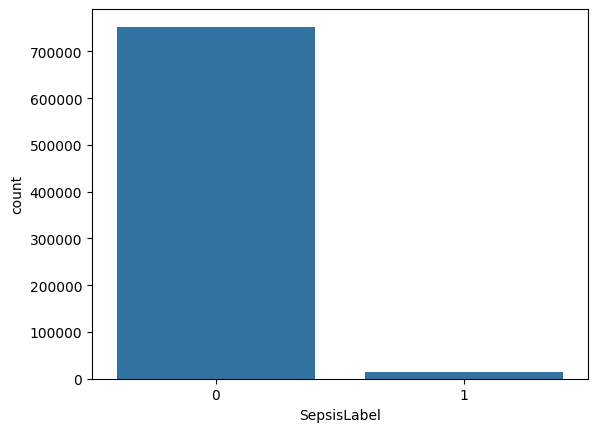

In [144]:
sns.countplot(data=df_train_impute, x="SepsisLabel")

In [145]:
# check distribution of data points between the two classes

major_class = df_train_impute[df_train_impute['SepsisLabel'] == 0]
minor_class = df_train_impute[df_train_impute['SepsisLabel'] == 1]

print(f'SepsisLabel 0 (i.e., non-Sepsis patient), n = {len(major_class)}')
print(f'SepsisLabel 1 (i.e., Sepsis patient), n = {len(minor_class)}')

SepsisLabel 0 (i.e., non-Sepsis patient), n = 752819
SepsisLabel 1 (i.e., Sepsis patient), n = 15344


In [146]:
# Undersampling
major_class_subset = major_class.sample(n=2*len(minor_class))
df_train_impute = pd.concat([major_class_subset, minor_class])

<Axes: xlabel='SepsisLabel', ylabel='count'>

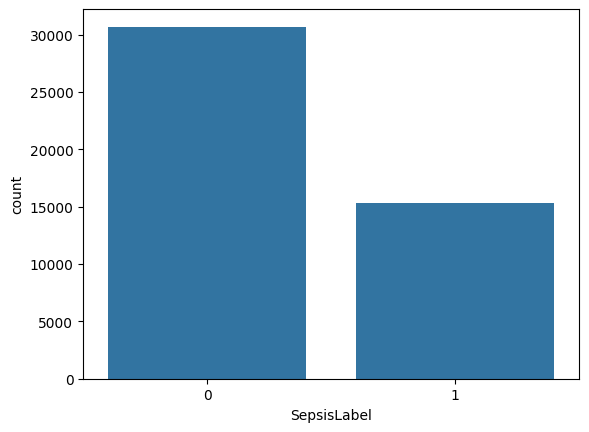

In [147]:
sns.countplot(data=df_train_impute, x="SepsisLabel")

## Split Train Set (Hospital 1) into training and validation subsets

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Splitting test and train
X = df_train_impute.drop(["SepsisLabel"], axis=1)
Y = df_train_impute["SepsisLabel"]

#Getting Y_train, X_train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

#Scaling values
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [149]:
X_train

array([[ 0.07124165, -0.41676286,  0.26445099, ..., -1.17832172,
         0.33046568, -0.0052108 ],
       [ 0.58618655,  0.62934251,  1.68765544, ..., -1.17832172,
         0.28641834,  3.84592115],
       [ 0.52897045,  0.28064072,  0.77045988, ..., -1.17832172,
         0.33052006,  3.06185836],
       ...,
       [-0.50091936, -1.46286824, -0.74485108, ..., -1.17832172,
        -0.21680897, -0.81233427],
       [ 0.01402555,  0.62934251, -0.13589443, ..., -1.17832172,
        -0.84657723, -0.81233427],
       [-1.53080917,  0.28064072, -0.40385196, ...,  0.84866466,
         0.33057444,  0.50212395]])

# Build Models

In [171]:
# import evaluation packages
from sklearn.metrics import classification_report,accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# evaluation function
def eval_model(Y_actual, Y_predict, model_name):
    # get evaluation metrics
    labels = ["No Sepsis", "Sepsis"]
    results = classification_report(Y_actual, Y_predict, target_names=labels)
    print(results)
    
    """# save evaluation metrics in table
    results_tab = pd.Series(
        [results],
        index=["accuracy", "precision", "recall", "F-score", "ROC"],
        name=model_name)"""
    
    # plot a confusion matrix
    cm = confusion_matrix(Y_actual, Y_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.show()

    return results

In [154]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', verbose=100)
# execute the grid search
grid_result = grid_search.fit(X_train, Y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 15 folds for each of 20 candidates, totalling 300 fits


[CV 4/15; 1/20] START learning_rate=0.0001, n_estimators=10.....................
[CV 5/15; 1/20] START learning_rate=0.0001, n_estimators=10.....................
[CV 2/15; 1/20] START learning_rate=0.0001, n_estimators=10.....................
[CV 8/15; 1/20] START learning_rate=0.0001, n_estimators=10.....................
[CV 3/15; 1/20] START learning_rate=0.0001, n_estimators=10.....................
[CV 1/15; 1/20] START learning_rate=0.0001, n_estimators=10.....................
[CV 6/15; 1/20] START learning_rate=0.0001, n_estimators=10.....................
[CV 7/15; 1/20] START learning_rate=0.0001, n_estimators=10.....................
[CV 5/15; 1/20] END learning_rate=0.0001, n_estimators=10;, score=0.767 total time=   0.4s
[CV 8/15; 1/20] END learning_rate=0.0001, n_estimators=10;, score=0.769 total time=   0.4s
[CV 3/15; 1/20] END learning_rate=0.0001, n_estimators=10;, score=0.752 total time=   0.4s
[CV 4/15; 1/20] END learning_rate=0.0001, n_estimators=10;, score=0.762 total t

              precision    recall  f1-score   support

   No Sepsis       0.79      0.91      0.85      6165
      Sepsis       0.75      0.52      0.62      3042

    accuracy                           0.78      9207
   macro avg       0.77      0.72      0.73      9207
weighted avg       0.78      0.78      0.77      9207



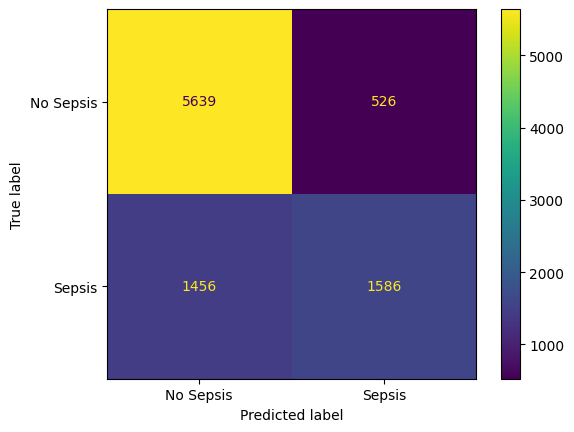

In [172]:
Y_pred_ADA_boosting = grid_search.predict(X_test)

result_ADA = eval_model(Y_test, Y_pred_ADA_boosting, 'ADA Boosting')

[Text(0, 0, 'HR'),
 Text(1, 0, 'O2Sat'),
 Text(2, 0, 'Temp'),
 Text(3, 0, 'MAP'),
 Text(4, 0, 'Resp'),
 Text(5, 0, 'Glucose'),
 Text(6, 0, 'Potassium'),
 Text(7, 0, 'Hct'),
 Text(8, 0, 'WBC'),
 Text(9, 0, 'Age'),
 Text(10, 0, 'Gender'),
 Text(11, 0, 'HospAdmTime'),
 Text(12, 0, 'ICULOS')]

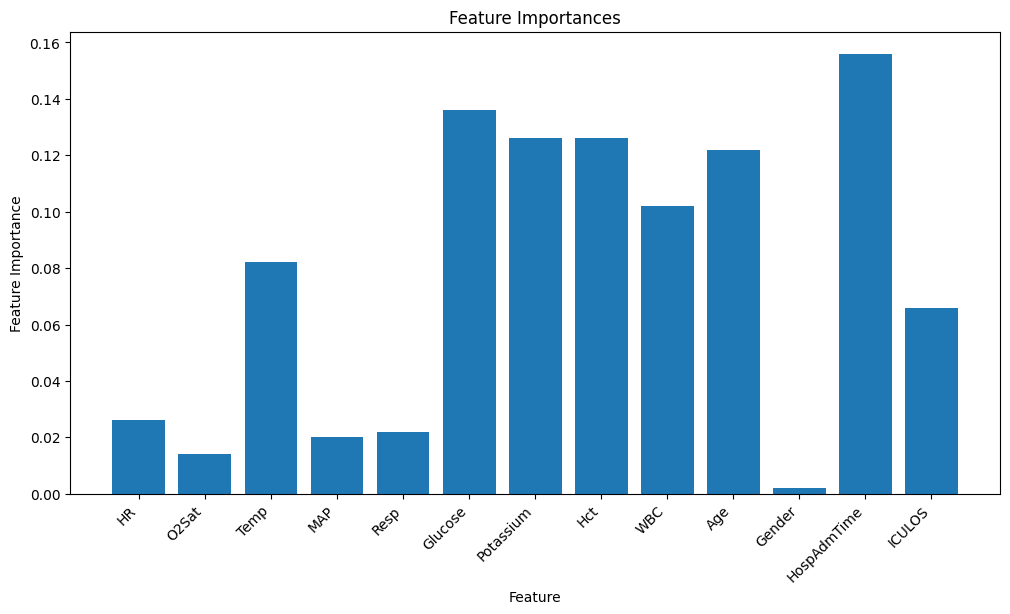

In [186]:
# Get the best estimator
best_rf = grid_search.best_estimator_

# Access feature importances
feature_importances = best_rf.feature_importances_

# Set the width of the figure
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width as needed

# Plot
ax.bar(range(len(feature_importances)), feature_importances)
ax.set_xlabel('Feature')
ax.set_ylabel('Feature Importance')
ax.set_title('Feature Importances')
ax.set_xticks(range(len(feature_importances)))
ax.set_xticklabels(X.columns, rotation=45, ha='right')

# XGboost

In [176]:
from xgboost import XGBClassifier


X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, pd.factorize(Y)[0], test_size=0.2, random_state=101)


xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

   No Sepsis       0.90      0.93      0.92      6165
      Sepsis       0.85      0.79      0.82      3042

    accuracy                           0.89      9207
   macro avg       0.88      0.86      0.87      9207
weighted avg       0.89      0.89      0.89      9207



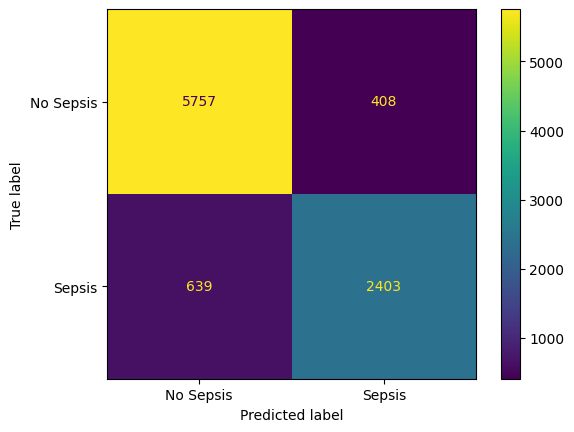

In [178]:
Y_pred_XGBoost = xgb.predict(X_test)

result_ADA = eval_model(Y_test, Y_pred_XGBoost, 'XGBoost')

In [180]:
X.head()

,HR,O2Sat,Temp,MAP,Resp,Glucose,Potassium,Hct,WBC,Age,Gender,HospAdmTime,ICULOS
634948,84.0,100.0,36.000000,91.00,10.0,154.000000,4.200000,24.22,10.200,74.65,0,-20.02,7
776839,58.0,94.0,37.220000,91.00,18.5,111.466667,3.763636,35.85,8.375,48.03,1,-5.45,64
506857,98.0,94.0,37.155714,65.67,23.0,111.500000,4.150000,29.66,4.100,64.24,0,-457.93,13
486738,115.0,99.0,37.288750,118.00,24.0,121.666667,3.760000,33.00,13.000,24.55,1,-0.03,47
629670,95.0,100.0,37.112500,82.50,15.0,120.000000,3.800000,28.30,7.100,48.46,1,-0.03,3


[Text(0, 0, 'HR'),
 Text(1, 0, 'O2Sat'),
 Text(2, 0, 'Temp'),
 Text(3, 0, 'MAP'),
 Text(4, 0, 'Resp'),
 Text(5, 0, 'Glucose'),
 Text(6, 0, 'Potassium'),
 Text(7, 0, 'Hct'),
 Text(8, 0, 'WBC'),
 Text(9, 0, 'Age'),
 Text(10, 0, 'Gender'),
 Text(11, 0, 'HospAdmTime'),
 Text(12, 0, 'ICULOS')]

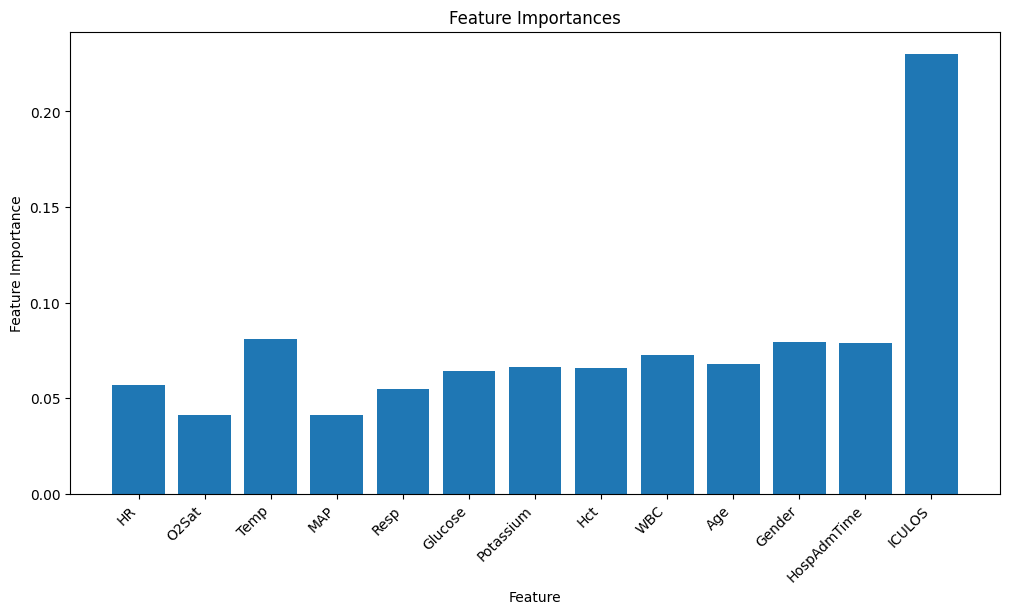

In [184]:
# Sample data (replace it with actual feature importances)
feature_importances = xgb.feature_importances_

# Set the width of the figure
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width as needed

# Plot
ax.bar(range(len(feature_importances)), feature_importances)
ax.set_xlabel('Feature')
ax.set_ylabel('Feature Importance')
ax.set_title('Feature Importances')
ax.set_xticks(range(len(feature_importances)))
ax.set_xticklabels(X.columns, rotation=45, ha='right')
